### Prepare data and visualization for windspeed

In [1121]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

In [1122]:
TIMEZONE = 'Asia/Ho_Chi_Minh' # "UTC"

In [1123]:
# LOAD FROM CSV TO PANDAS
real_wind_df = pd.read_csv('real-data/real_windspeed.csv')

# SHOW DATA
real_wind_df.head(5)

PCTimeStamp HD01_Ambient WindSpeed Avg. (1)  \
0  2024-04-01 0:00:00+07:00                           4.293   
1  2024-04-01 0:10:00+07:00                           3.566   
2  2024-04-01 0:20:00+07:00                           3.898   
3  2024-04-01 0:30:00+07:00                           3.762   
4  2024-04-01 0:40:00+07:00                           3.691   

  HD02_Ambient WindSpeed Avg. (2) HD03_Ambient WindSpeed Avg. (3)  \
0                           3.012                           4.535   
1                             1.5                           3.102   
2                           1.965                           1.863   
3                           3.242                           2.824   
4                           3.902                           2.176   

  HD04_Ambient WindSpeed Avg. (4) HD05_Ambient WindSpeed Avg. (5)  \
0                           3.637                           4.395   
1                           2.543                           3.117   
2                           2.402                            2.41   
3                           3.008                           2.254   
4                           3.512                           2.387   

  HD06_Ambient WindSpeed Avg. (6) HD07_Ambient WindSpeed Avg. (7)  \
0                           3.758                           3.484   
1                            3.23                           2.574   
2                           2.215                           1.832   
3                           2.461                           2.258   
4                           3.168                           3.094   

   HD08_Ambient WindSpeed Avg. (8)  
0                            3.262  
1                            2.766  
2                            2.148  
3                            2.207  
4                            2.207

In [1124]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to PCTimeStamp field to datetime type
real_wind_df['PCTimeStamp'] = pd.to_datetime(real_wind_df['PCTimeStamp'])

# Convert from Local Timezone to UTC+7 (Asia Ho Chi Minh)
real_wind_df['PCTimeStamp'] = real_wind_df['PCTimeStamp'].dt.tz_convert(TIMEZONE)

# Convert some columns to numeric type
numeric_columns = ['HD01_Ambient WindSpeed Avg. (1)', 'HD02_Ambient WindSpeed Avg. (2)', 'HD03_Ambient WindSpeed Avg. (3)', 'HD04_Ambient WindSpeed Avg. (4)', 'HD05_Ambient WindSpeed Avg. (5)', 'HD06_Ambient WindSpeed Avg. (6)', 'HD07_Ambient WindSpeed Avg. (7)', 'HD08_Ambient WindSpeed Avg. (8)']
real_wind_df[numeric_columns] = real_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [1125]:
# CHECK DATA AFTER PREPROCESSING
real_wind_df.head(5)

PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
0 2024-04-01 00:00:00+07:00                            4.293   
1 2024-04-01 00:10:00+07:00                            3.566   
2 2024-04-01 00:20:00+07:00                            3.898   
3 2024-04-01 00:30:00+07:00                            3.762   
4 2024-04-01 00:40:00+07:00                            3.691   

   HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
0                            3.012                            4.535   
1                            1.500                            3.102   
2                            1.965                            1.863   
3                            3.242                            2.824   
4                            3.902                            2.176   

   HD04_Ambient WindSpeed Avg. (4)  HD05_Ambient WindSpeed Avg. (5)  \
0                            3.637                            4.395   
1                            2.543                            3.117   
2                            2.402                            2.410   
3                            3.008                            2.254   
4                            3.512                            2.387   

   HD06_Ambient WindSpeed Avg. (6)  HD07_Ambient WindSpeed Avg. (7)  \
0                            3.758                            3.484   
1                            3.230                            2.574   
2                            2.215                            1.832   
3                            2.461                            2.258   
4                            3.168                            3.094   

   HD08_Ambient WindSpeed Avg. (8)  
0                            3.262  
1                            2.766  
2                            2.148  
3                            2.207  
4                            2.207

In [1126]:
# CHECK TYPE OF ALL COLUMNS
real_wind_df.dtypes

PCTimeStamp                        datetime64[ns, Asia/Ho_Chi_Minh]
HD01_Ambient WindSpeed Avg. (1)                             float64
HD02_Ambient WindSpeed Avg. (2)                             float64
HD03_Ambient WindSpeed Avg. (3)                             float64
HD04_Ambient WindSpeed Avg. (4)                             float64
HD05_Ambient WindSpeed Avg. (5)                             float64
HD06_Ambient WindSpeed Avg. (6)                             float64
HD07_Ambient WindSpeed Avg. (7)                             float64
HD08_Ambient WindSpeed Avg. (8)                             float64
dtype: object

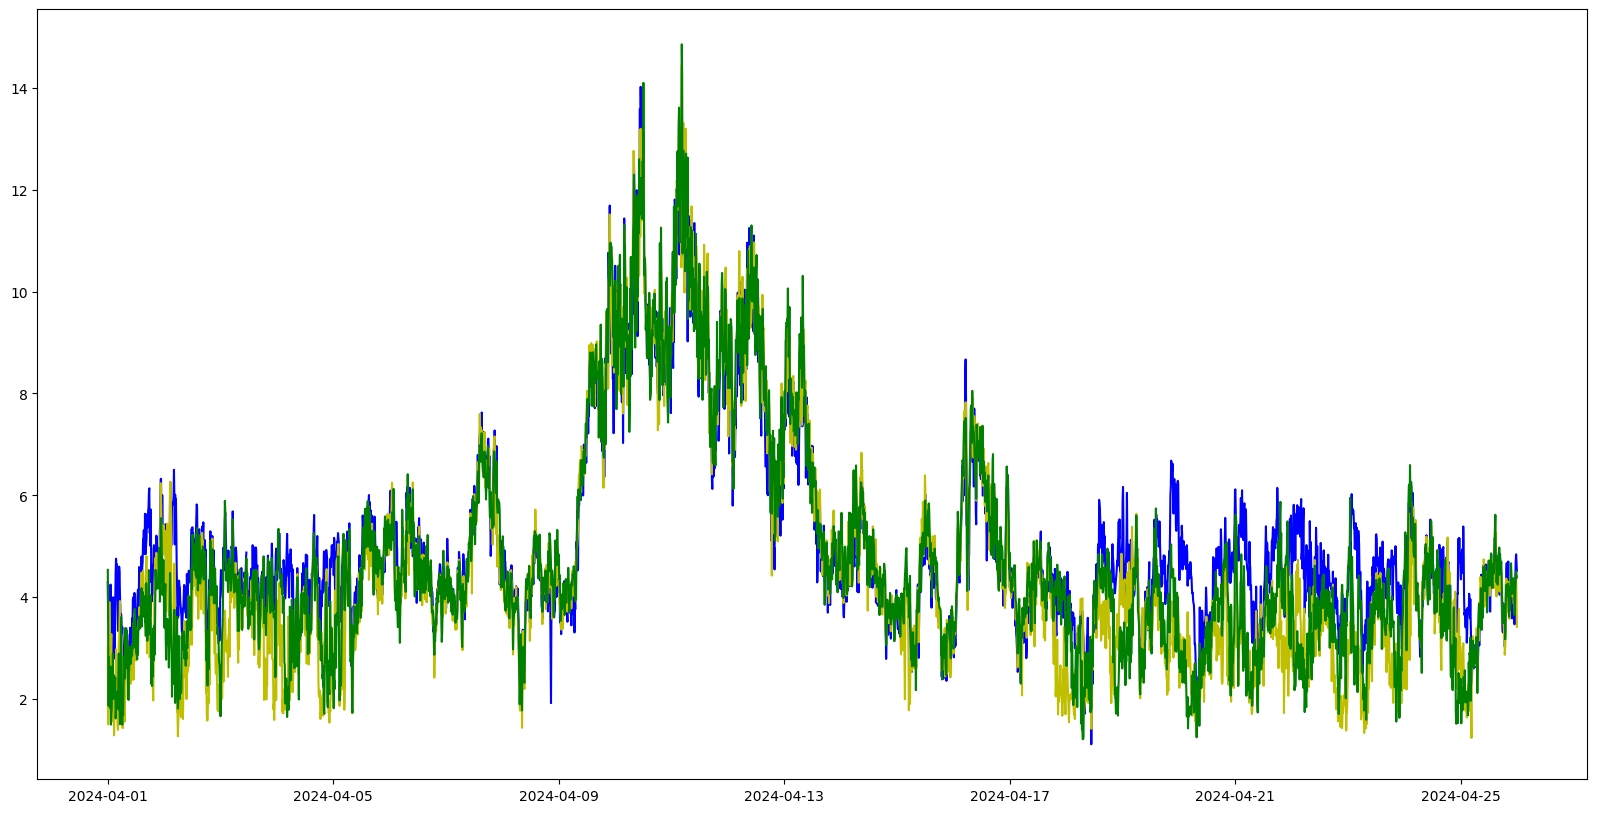

In [1127]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(20, 10))
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD01_Ambient WindSpeed Avg. (1)"], "b")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
plt.show()

### Prepare data and visualization for glass forecast

In [1128]:
# LOAD FROM CSV TO PANDAS
glass_wind_df = pd.read_csv('csv/glass_forecast_100m.csv')

# SHOW DATA
glass_wind_df.head(5)

time  noaa    sg
0  2024-04-04T00:00:00+00:00  3.35  3.35
1  2024-04-04T01:00:00+00:00  3.75  3.75
2  2024-04-04T02:00:00+00:00  4.16  4.16
3  2024-04-04T03:00:00+00:00  4.56  4.56
4  2024-04-04T04:00:00+00:00  5.05  5.05

In [1129]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to time field to datetime type
glass_wind_df['time'] = pd.to_datetime(glass_wind_df['time']).dt.tz_convert(TIMEZONE)

# Convert some columns to numeric type
numeric_columns = ['noaa', 'sg']
glass_wind_df[numeric_columns] = glass_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [1130]:
# Set time field as index 
glass_wind_df.set_index('time', inplace=True)
glass_wind_df.head(5)

noaa    sg
time                                 
2024-04-04 07:00:00+07:00  3.35  3.35
2024-04-04 08:00:00+07:00  3.75  3.75
2024-04-04 09:00:00+07:00  4.16  4.16
2024-04-04 10:00:00+07:00  4.56  4.56
2024-04-04 11:00:00+07:00  5.05  5.05

In [1131]:
glass_wind_df.index

DatetimeIndex(['2024-04-04 07:00:00+07:00', '2024-04-04 08:00:00+07:00',
               '2024-04-04 09:00:00+07:00', '2024-04-04 10:00:00+07:00',
               '2024-04-04 11:00:00+07:00', '2024-04-04 12:00:00+07:00',
               '2024-04-04 13:00:00+07:00', '2024-04-04 14:00:00+07:00',
               '2024-04-04 15:00:00+07:00', '2024-04-04 16:00:00+07:00',
               ...
               '2024-05-01 21:00:00+07:00', '2024-05-01 22:00:00+07:00',
               '2024-05-01 23:00:00+07:00', '2024-05-02 00:00:00+07:00',
               '2024-05-02 01:00:00+07:00', '2024-05-02 02:00:00+07:00',
               '2024-05-02 03:00:00+07:00', '2024-05-02 04:00:00+07:00',
               '2024-05-02 05:00:00+07:00', '2024-05-02 06:00:00+07:00'],
              dtype='datetime64[ns, Asia/Ho_Chi_Minh]', name='time', length=576, freq=None)

In [1132]:
# Resample with 10-minute frequency and perform linear interpolation
glass_wind_df = glass_wind_df.resample('10T').interpolate(method='linear')
glass_wind_df.head(5)

/var/folders/3m/lrfnnq890n55hk28xnx6hswc0000gn/T/ipykernel_7117/1205144806.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  glass_wind_df = glass_wind_df.resample('10T').interpolate(method='linear')


noaa        sg
time                                         
2024-04-04 07:00:00+07:00  3.350000  3.350000
2024-04-04 07:10:00+07:00  3.416667  3.416667
2024-04-04 07:20:00+07:00  3.483333  3.483333
2024-04-04 07:30:00+07:00  3.550000  3.550000
2024-04-04 07:40:00+07:00  3.616667  3.616667

In [1133]:
# Reset index to get 'time' back as a column
glass_wind_df.reset_index(inplace=True)
glass_wind_df.head(5)

time      noaa        sg
0 2024-04-04 07:00:00+07:00  3.350000  3.350000
1 2024-04-04 07:10:00+07:00  3.416667  3.416667
2 2024-04-04 07:20:00+07:00  3.483333  3.483333
3 2024-04-04 07:30:00+07:00  3.550000  3.550000
4 2024-04-04 07:40:00+07:00  3.616667  3.616667

In [1134]:
# CHECK TYPE OF ALL COLUMNS
glass_wind_df.dtypes

time    datetime64[ns, Asia/Ho_Chi_Minh]
noaa                             float64
sg                               float64
dtype: object

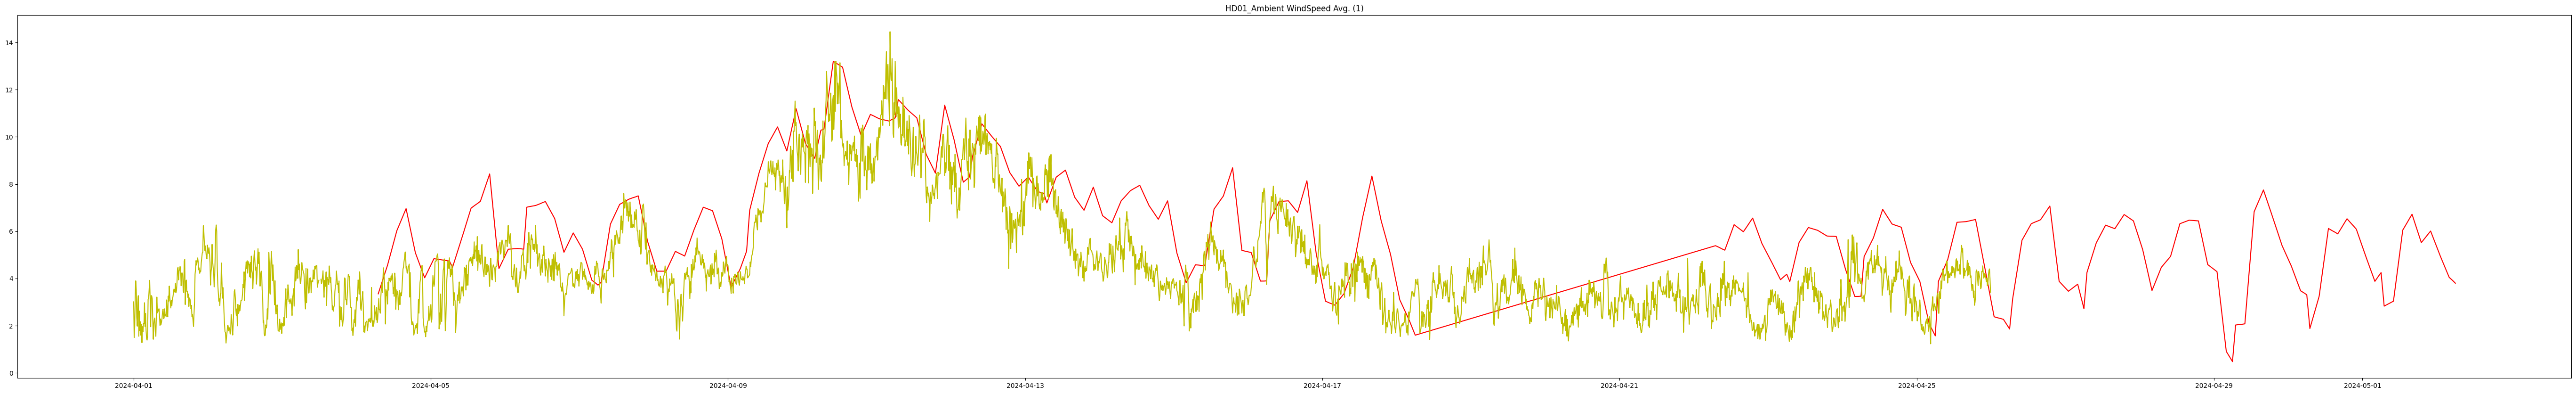

In [1135]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

### Prepare train & test data

#### Visual whole data

In [1136]:
real_wind_df

PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
0    2024-04-01 00:00:00+07:00                            4.293   
1    2024-04-01 00:10:00+07:00                            3.566   
2    2024-04-01 00:20:00+07:00                            3.898   
3    2024-04-01 00:30:00+07:00                            3.762   
4    2024-04-01 00:40:00+07:00                            3.691   
...                        ...                              ...   
3595 2024-04-25 23:10:00+07:00                            4.383   
3596 2024-04-25 23:20:00+07:00                            4.699   
3597 2024-04-25 23:30:00+07:00                            4.840   
3598 2024-04-25 23:40:00+07:00                            4.676   
3599 2024-04-25 23:50:00+07:00                            4.516   

      HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
0                               3.012                            4.535   
1                               1.500                            3.102   
2                               1.965                            1.863   
3                               3.242                            2.824   
4                               3.902                            2.176   
...                               ...                              ...   
3595                            4.152                            4.113   
3596                            4.344                            4.313   
3597                            4.406                            4.508   
3598                            4.012                            4.449   
3599                            3.418                            4.387   

      HD04_Ambient WindSpeed Avg. (4)  HD05_Ambient WindSpeed Avg. (5)  \
0                               3.637                            4.395   
1                               2.543                            3.117   
2                               2.402                            2.410   
3                               3.008                            2.254   
4                               3.512                            2.387   
...                               ...                              ...   
3595                            4.191                            4.316   
3596                            4.164                            4.355   
3597                            4.152                            4.289   
3598                            4.277                            4.223   
3599                            3.551                            4.117   

      HD06_Ambient WindSpeed Avg. (6)  HD07_Ambient WindSpeed Avg. (7)  \
0                               3.758                            3.484   
1                               3.230                            2.574   
2                               2.215                            1.832   
3                               2.461                            2.258   
4                               3.168                            3.094   
...                               ...                              ...   
3595                            4.430                            4.352   
3596                            4.168                            4.566   
3597                            4.066                            4.336   
3598                            3.906                            4.184   
3599                            3.797                            3.680   

      HD08_Ambient WindSpeed Avg. (8)  
0                               3.262  
1                               2.766  
2                               2.148  
3                               2.207  
4                               2.207  
...                               ...  
3595                            4.203  
3596                            4.648  
3597                            4.520  
3598                            4.469  
3599                            4.188  

[3600 rows x 9 columns]

In [1137]:
glass_wind_df

time      noaa        sg
0    2024-04-04 07:00:00+07:00  3.350000  3.350000
1    2024-04-04 07:10:00+07:00  3.416667  3.416667
2    2024-04-04 07:20:00+07:00  3.483333  3.483333
3    2024-04-04 07:30:00+07:00  3.550000  3.550000
4    2024-04-04 07:40:00+07:00  3.616667  3.616667
...                        ...       ...       ...
4022 2024-05-02 05:20:00+07:00  3.886667  3.886667
4023 2024-05-02 05:30:00+07:00  3.865000  3.865000
4024 2024-05-02 05:40:00+07:00  3.843333  3.843333
4025 2024-05-02 05:50:00+07:00  3.821667  3.821667
4026 2024-05-02 06:00:00+07:00  3.800000  3.800000

[4027 rows x 3 columns]

#### Prepare Train Data

In [1138]:
train_real_wind_df = real_wind_df[real_wind_df["PCTimeStamp"] >= "2024-04-04 07:00:00+00:00"]
train_real_wind_df = train_real_wind_df[train_real_wind_df["PCTimeStamp"] <= "2024-04-16 23:50:00+07:00"]


y_train = np.array(train_real_wind_df["HD01_Ambient WindSpeed Avg. (1)"])

print(train_real_wind_df)
print("y_train.shape = ", y_train.shape)

                   PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
516  2024-04-04 14:00:00+07:00                            3.926   
517  2024-04-04 14:10:00+07:00                            4.012   
518  2024-04-04 14:20:00+07:00                            3.512   
519  2024-04-04 14:30:00+07:00                            3.797   
520  2024-04-04 14:40:00+07:00                            3.813   
...                        ...                              ...   
2299 2024-04-16 23:10:00+07:00                            6.391   
2300 2024-04-16 23:20:00+07:00                            5.691   
2301 2024-04-16 23:30:00+07:00                            5.273   
2302 2024-04-16 23:40:00+07:00                            4.852   
2303 2024-04-16 23:50:00+07:00                            4.426   

      HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
516                             2.891                            3.645   
517                             3.316          

In [1139]:
# Filter glass-forecast data
train_glass_wind_df = glass_wind_df[glass_wind_df["time"] >= "2024-04-04 07:00:00+00:00"]
train_glass_wind_df = train_glass_wind_df[train_glass_wind_df["time"] <= "2024-04-16 23:50:00+07:00"]

X_train = np.array(train_glass_wind_df["noaa"]).copy()
X_train = X_train.reshape(-1, 1)

print(train_glass_wind_df)
print("X_train.shape = ", X_train.shape)

                          time      noaa        sg
42   2024-04-04 14:00:00+07:00  6.330000  6.330000
43   2024-04-04 14:10:00+07:00  6.383333  6.383333
44   2024-04-04 14:20:00+07:00  6.436667  6.436667
45   2024-04-04 14:30:00+07:00  6.490000  6.490000
46   2024-04-04 14:40:00+07:00  6.543333  6.543333
...                        ...       ...       ...
1825 2024-04-16 23:10:00+07:00  4.276667  4.276667
1826 2024-04-16 23:20:00+07:00  4.163333  4.163333
1827 2024-04-16 23:30:00+07:00  4.050000  4.050000
1828 2024-04-16 23:40:00+07:00  3.936667  3.936667
1829 2024-04-16 23:50:00+07:00  3.823333  3.823333

[1788 rows x 3 columns]
X_train.shape =  (1788, 1)


#### Prepare Test Data

In [1140]:
test_real_wind_df = real_wind_df[real_wind_df["PCTimeStamp"] >= "2024-04-22 07:00:00+07:00"]
test_real_wind_df = test_real_wind_df[test_real_wind_df["PCTimeStamp"] <= "2024-04-25 23:50:00+07:00"]

y_test = np.array(test_real_wind_df["HD01_Ambient WindSpeed Avg. (1)"])

print(test_real_wind_df)
print("y_test.shape = ", y_test.shape)

                   PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
3066 2024-04-22 07:00:00+07:00                            4.105   
3067 2024-04-22 07:10:00+07:00                            4.594   
3068 2024-04-22 07:20:00+07:00                            3.984   
3069 2024-04-22 07:30:00+07:00                            3.617   
3070 2024-04-22 07:40:00+07:00                            5.492   
...                        ...                              ...   
3595 2024-04-25 23:10:00+07:00                            4.383   
3596 2024-04-25 23:20:00+07:00                            4.699   
3597 2024-04-25 23:30:00+07:00                            4.840   
3598 2024-04-25 23:40:00+07:00                            4.676   
3599 2024-04-25 23:50:00+07:00                            4.516   

      HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
3066                            2.383                            2.410   
3067                            2.418          

In [1141]:
test_glass_wind_df = glass_wind_df[glass_wind_df["time"] >= "2024-04-22 07:00:00+07:00"]
test_glass_wind_df = test_glass_wind_df[test_glass_wind_df["time"] <= "2024-04-25 23:50:00+07:00"]

X_test = np.array(test_glass_wind_df["noaa"]).copy()
X_test = X_test.reshape(-1, 1)

print(test_glass_wind_df)
print("X_test.shape = ", X_test.shape)


                          time   noaa     sg
2592 2024-04-22 07:00:00+07:00  5.390  5.390
2593 2024-04-22 07:10:00+07:00  5.380  5.380
2594 2024-04-22 07:20:00+07:00  5.370  5.370
2595 2024-04-22 07:30:00+07:00  5.360  5.360
2596 2024-04-22 07:40:00+07:00  5.350  5.350
...                        ...    ...    ...
3121 2024-04-25 23:10:00+07:00  3.645  3.645
3122 2024-04-25 23:20:00+07:00  3.530  3.530
3123 2024-04-25 23:30:00+07:00  3.415  3.415
3124 2024-04-25 23:40:00+07:00  3.300  3.300
3125 2024-04-25 23:50:00+07:00  3.185  3.185

[534 rows x 3 columns]
X_test.shape =  (534, 1)


### Test Algorithm

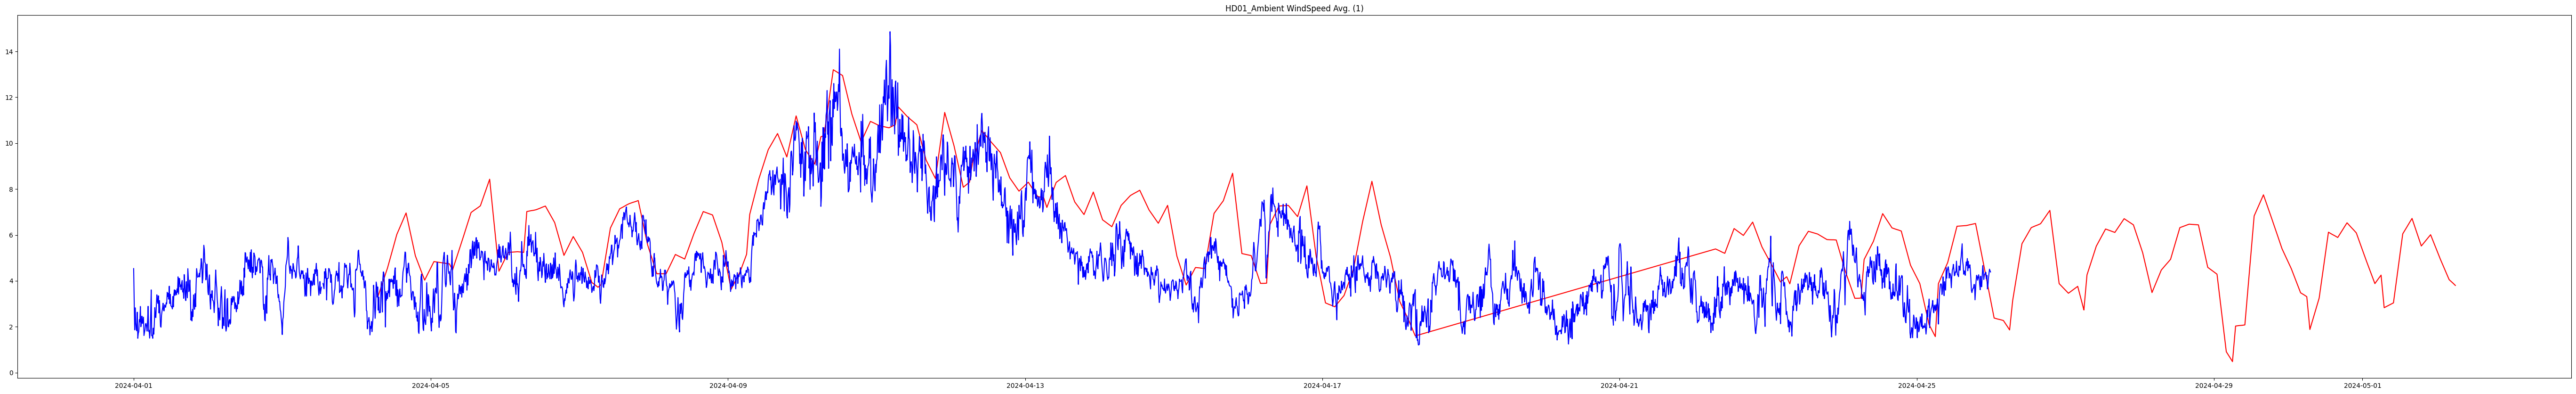

In [1142]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [1143]:
print(len(glass_wind_df))
print(len(real_wind_df))

4027
3600


In [1144]:
# SPLIT INTO TRAIN & TEST DATA 
split_index = 1300

# REAL DATA
real_wind_df = real_wind_df[:split_index]
test_real_wind_df = real_wind_df[split_index:] # for test
y_test = np.array(test_real_wind_df)

# PREDICT DATA (NEED TO BE FINETUNED MORE)

glass_wind_df = glass_wind_df[:split_index]
test_glass_wind_df = glass_wind_df[split_index:]  # for test

X_test = np.array(test_glass_wind_df["noaa"]).copy()
X_test = X_test.reshape(-1, 1)


In [1145]:
# CHOOSE ACTUAL WINDSPEEDS

actual_windspeeds = np.array(real_wind_df["HD01_Ambient WindSpeed Avg. (1)"])
test_actual_windspeeds = np.array(test_real_wind_df["HD01_Ambient WindSpeed Avg. (1)"])

# actual_windspeeds = np.array(real_wind_df["HD02_Ambient WindSpeed Avg. (2)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD02_Ambient WindSpeed Avg. (2)"])

# actual_windspeeds = np.array(real_wind_df["HD03_Ambient WindSpeed Avg. (3)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD03_Ambient WindSpeed Avg. (3)"])

# actual_windspeeds = np.array(real_wind_df["HD04_Ambient WindSpeed Avg. (4)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD04_Ambient WindSpeed Avg. (4)"])

# actual_windspeeds = np.array(real_wind_df["HD05_Ambient WindSpeed Avg. (5)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD05_Ambient WindSpeed Avg. (5)"])

# actual_windspeeds = np.array(real_wind_df["HD06_Ambient WindSpeed Avg. (6)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD06_Ambient WindSpeed Avg. (6)"])

# actual_windspeeds = np.array(real_wind_df["HD07_Ambient WindSpeed Avg. (7)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD07_Ambient WindSpeed Avg. (7)"])

# actual_windspeeds = np.array(real_wind_df["HD08_Ambient WindSpeed Avg. (8)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD08_Ambient WindSpeed Avg. (8)"])


# CHOOSE PREDICTED WINDSPEED
predicted_windspeeds = np.array(glass_wind_df["noaa"])
test_predicted_windspeeds = np.array(test_glass_wind_df["noaa"])

In [1146]:
print(test_predicted_windspeeds.shape)

(0,)


===== PLOT BETWEEN: DESAMPLE ACTUAL WINDSPEED TO BE MORE NOT CHANGING SO MUCH 



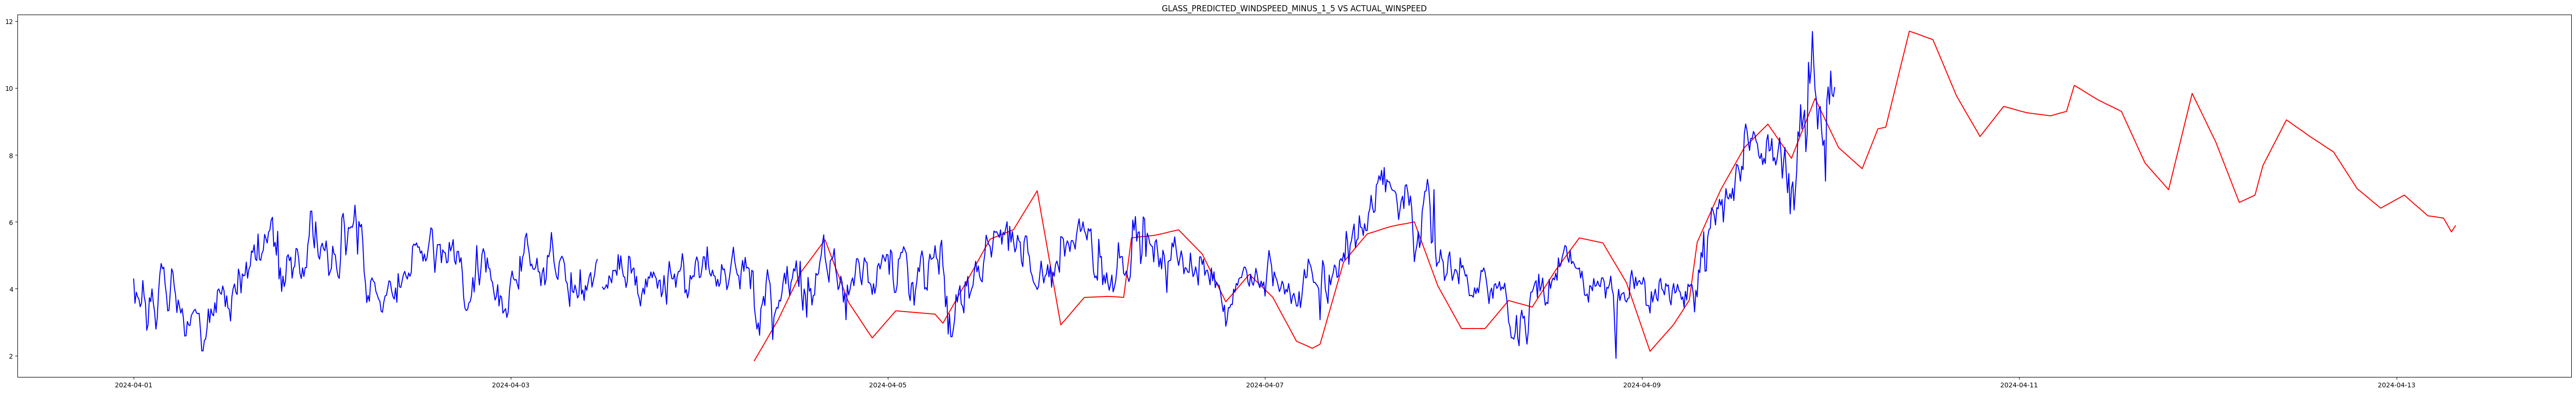

In [1147]:
print("===== PLOT BETWEEN: DESAMPLE ACTUAL WINDSPEED TO BE MORE NOT CHANGING SO MUCH \n")

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED")
plt.show()

In [1148]:
stable_actual_windspeeds = actual_windspeeds.copy()

window = 20
for index in range(window, len(stable_actual_windspeeds), window):
    stable_actual_windspeeds[index-window:index] = stable_actual_windspeeds[index-window:index].mean()

print("stable_actual_windspeeds = ", stable_actual_windspeeds)

stable_actual_windspeeds =  [ 3.5786  3.5786  3.5786 ...  9.809   9.742  10.016 ]


In [1149]:
print("===== PLOT BETWEEN: DESAMPLE ACTUAL WINDSPEED TO BE MORE NOT CHANGING SO MUCH \n")

plt.figure(1, figsize=(70, 10))
# plt.plot(glass_wind_df["time"], predicted_windspeeds_minus_1_5, "r")

plt.plot(range(0, stable_actual_windspeeds.shape[0]), stable_actual_windspeeds, "b")
plt.plot(range(0, actual_windspeeds.shape[0]), actual_windspeeds, "r")
plt.title("GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED")
plt.show()

===== PLOT BETWEEN: DESAMPLE ACTUAL WINDSPEED TO BE MORE NOT CHANGING SO MUCH 



In [1150]:
# MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED

print("===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse_1 = mean_squared_error(actual_windspeeds, predicted_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse_1)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds)
windspeed_mape_1 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds)
print("Mean Absolute Percentage Error (MAPE):", windspeed_mape_1)

===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED 



ValueError: Input contains NaN.

In [ ]:
# Minus raw-forecast windspeed by 1.5
predicted_windspeeds_minus_1_5 = predicted_windspeeds-1.5

In [ ]:
# MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED

print("===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse_2 = mean_squared_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("Mean Squared Error (MSE):", windspeed_mse_2)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape_2 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_minus_1_5:", windspeed_mape_2)

windspeed_mape_3 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds-1.26)
print("MAPE_minus_1_26:", windspeed_mape_3)

===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.3864968496581196
MAPE_minus_1_5: 16.176620303638998
MAPE_minus_1_26: 16.019975790401123


In [ ]:
import numpy as np

# Splitting 0 to 3 into increments of 0.1
result = np.arange(0, 3.1, 0.1)

best_value = None
best_error = 1000
for value in np.arange(0, 5.1, 0.1):
    mape_error = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds-value)
    if mape_error < best_error:
        best_error = mape_error
        best_value = value

print("best_error = ", best_error)
print("best_value = ", best_value)

print("\n")

windspeed_mape_2 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds-best_value)
print("MAPE_TRAIN:", windspeed_mape_2)

windspeed_mape_2 = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-best_value)
print("MAPE_TEST:", windspeed_mape_2)

print("\n")

best_value = None
best_error = 1000
for value in np.arange(0, 5.1, 0.1):
    mape_error = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-value)
    if mape_error < best_error:
        best_error = mape_error
        best_value = value

print("best_error = ", best_error)
print("best_value = ", best_value)

best_error =  15.990663271944436
best_value =  1.3


MAPE_TRAIN: 15.990663271944436
MAPE_TEST: nan


best_error =  1000
best_value =  None


/Users/bachvietdung/Documents/projects/Piscada-VN/windspeed-forecast-project/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bachvietdung/Documents/projects/Piscada-VN/windspeed-forecast-project/env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:

# Find 
def find_best_threshold(start_index, stop_index):
    list_threshold = []
    list_error = []
    test_dict = {}
    best_threshold = None
    best_error = 1000
    for threshold in np.arange(-5, 5.1, 0.1):
        mape_error = mean_absolute_percentage_error(actual_windspeeds[start_index:stop_index], predicted_windspeeds[start_index:stop_index]-threshold)
        list_error.append(mape_error)
        list_threshold.append(threshold)
        test_dict[threshold] = mape_error
        if mape_error < best_error:
            best_error = mape_error
            best_threshold = threshold
    print(f"\nstart_index: stop_index = {start_index}:{stop_index}")
    print("best_error = ", best_error)
    print("best_threshold = ", best_threshold)
    # print("sorted_error = ", np.sort(np.array(list_error)))

    sorted_dict = dict(sorted(test_dict.items(), key=lambda item: item[1]))
    print(list(sorted_dict.items())[:10])

    sum =  0
    sum_weights = 0
    for (key, weight) in list(sorted_dict.items())[:10]:
        sum += key * 1.0/weight
        sum_weights += 1.0/weight

    print("average = ", sum/sum_weights)

    return best_threshold


start_index = 0
stop_index = -1
find_best_threshold(start_index, stop_index)

window_len = 10

print("\n========")
print(list(range(window_len, actual_windspeeds.shape[0], window_len)))

thres_predicted_windspeeds = predicted_windspeeds.copy()

for index in range(window_len, actual_windspeeds.shape[0], window_len):
    best_threshold = find_best_threshold(index-window_len, index)
    thres_predicted_windspeeds[index-window_len:index] -= best_threshold


start_index: stop_index = 0:-1
best_error =  15.973830292988483
best_threshold =  1.2999999999999776
[(1.2999999999999776, 15.973830292988483), (1.3999999999999773, 15.99738446934636), (1.199999999999978, 16.070727182695222), (1.499999999999977, 16.16309132014487), (1.0999999999999783, 16.25332132005953), (1.5999999999999766, 16.44560640161665), (0.9999999999999787, 16.548156621975586), (1.6999999999999762, 16.837828474400553), (0.899999999999979, 16.936221546333094), (1.7999999999999758, 17.347378538465158)]
average =  1.3479748276542485

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 9

In [ ]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "g")
plt.plot(glass_wind_df["time"], thres_predicted_windspeeds, "y")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [ ]:
mape_error_thres = mean_absolute_percentage_error(actual_windspeeds[:], thres_predicted_windspeeds[:])
mape_error_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[:], predicted_windspeeds[:]-1.5)
print("mape_error_thres = ", mape_error_thres)
print("mape_error_minus_1_5 = ", mape_error_minus_1_5)

mape_error_thres =  7.138219158387125
mape_error_minus_1_5 =  16.176620303638998


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED 



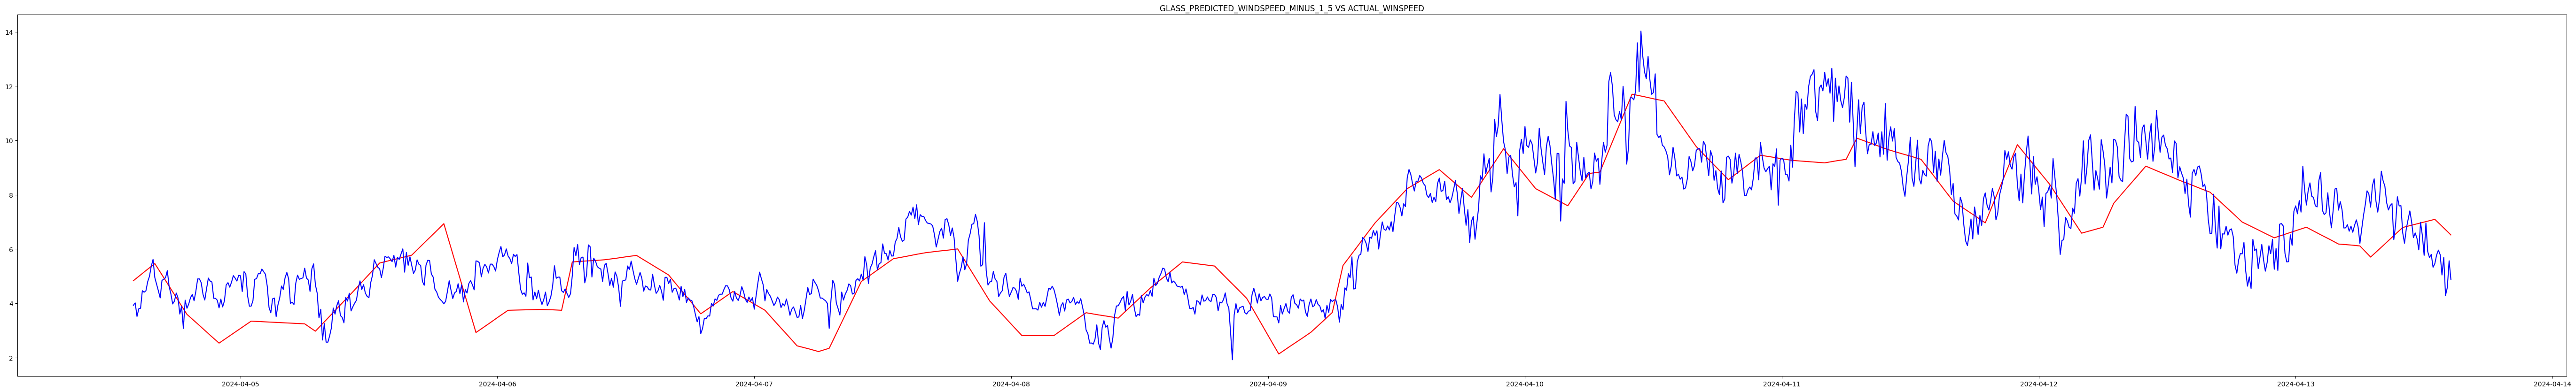

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED \n")

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], predicted_windspeeds_minus_1_5, "r")

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED")
plt.show()

In [ ]:
print("actual_windspeeds = ", actual_windspeeds)
print("predicted_windspeeds = ", predicted_windspeeds)
print("predicted_windspeeds_minus_1_5 = ", predicted_windspeeds_minus_1_5)

actual_windspeeds =  [3.926 4.012 3.512 ... 4.578 5.563 4.871]
predicted_windspeeds =  [6.33       6.38333333 6.43666667 ... 8.145      8.08       8.015     ]
predicted_windspeeds_minus_1_5 =  [4.83       4.88333333 4.93666667 ... 6.645      6.58       6.515     ]


In [ ]:
print("===== MEASURE: DIFFERENCE BETWEEN predicted_windspeeds VS actual_windspeeds \n")

difference = predicted_windspeeds - actual_windspeeds
print("difference.sum() = ", difference.sum())
print("predicted_windspeeds.shape[0] = ", predicted_windspeeds.shape[0])
print("Average Difference = ", difference.sum() / predicted_windspeeds.shape[0])

print("type(difference) = ", type(difference))
# print(difference)
sorted_data = np.sort(difference)[::-1]
print(sorted_data)

# Calculate the index for the top 50% and 75% of the largest values
index_50_percent = int(len(sorted_data) * 0.5)
index_75_percent = int(len(sorted_data) * 0.9)

# Calculate the averages
average_50_percent = np.mean(sorted_data[:index_50_percent])
average_75_percent = np.mean(sorted_data[:index_75_percent])

print("50% average of largest values:", average_50_percent)
print("75% average of largest values:", average_75_percent)

===== MEASURE: DIFFERENCE BETWEEN predicted_windspeeds VS actual_windspeeds 

difference.sum() =  1545.0969999999998
predicted_windspeeds.shape[0] =  1300
Average Difference =  1.1885361538461536
type(difference) =  <class 'numpy.ndarray'>
[ 4.453       4.295       4.292      ... -1.93533333 -2.03133333
 -2.313     ]
50% average of largest values: 2.1105276923076923
75% average of largest values: 1.4132404558404559


In [ ]:
# ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM 

print("========= ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM \n")

# actual_windspeeds
glass_predicted_windspeeds = predicted_windspeeds
# glass_predicted_windspeeds = predicted_windspeeds_minus_1_5

adjust_windspeeds = []
past_window_length = 40
future_window_length = 20
array_length = glass_predicted_windspeeds.shape[0]

print("array_length = ", array_length)

def get_average_difference(source_array, start_index, stop_index):
    return source_array[start_index:stop_index].sum()

adjust_windspeeds += list(actual_windspeeds[:past_window_length])
print(adjust_windspeeds)

difference = np.array(glass_predicted_windspeeds[:past_window_length]) - np.array(adjust_windspeeds)

print("difference = ", difference)
print("===== len(adjust_windspeeds) = ", len(adjust_windspeeds))

print(list(range(past_window_length, array_length, future_window_length)))

for index in range(past_window_length, array_length, future_window_length):
    tempo_diff_average = get_average_difference(difference, index-past_window_length, index) / past_window_length
    # test_diff = (tempo_diff_average + 1.5) / 2
    # test_diff = 1.5
    test_diff = tempo_diff_average

    if index + future_window_length < array_length:
        adjust_windspeeds += list(glass_predicted_windspeeds[index:index+future_window_length]-test_diff)
        difference = np.array(glass_predicted_windspeeds[:index + future_window_length]) - np.array(adjust_windspeeds)[:index + future_window_length]
    else: 
        adjust_windspeeds += list(glass_predicted_windspeeds[index:array_length]-test_diff)
        difference = np.array(glass_predicted_windspeeds[:index + future_window_length]) - np.array(adjust_windspeeds)[:index + future_window_length]
    
    print("===== len(adjust_windspeeds) = ", len(adjust_windspeeds))
    print("tempo_diff_average = ", tempo_diff_average)

print("glass_predicted_windspeeds = ", glass_predicted_windspeeds)
print("adjust_windspeeds = ", adjust_windspeeds)
print("len(adjust_windspeeds) = ", len(adjust_windspeeds))

========= ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM 

array_length =  1300
[3.926, 4.012, 3.512, 3.797, 3.813, 4.461, 4.406, 4.457, 4.793, 4.992, 5.363, 5.613, 4.941, 4.695, 4.453, 4.195, 4.84, 4.883, 4.941, 5.199, 4.617, 4.344, 3.973, 4.078, 4.375, 4.191, 3.602, 3.887, 3.074, 4.113, 3.813, 3.969, 4.207, 4.324, 4.09, 4.441, 4.895, 4.895, 4.754, 4.328]
difference =  [ 2.404       2.37133333  2.92466667  2.693       2.73033333  2.13566667
  2.244       2.24466667  1.96033333  1.813       1.49366667  1.29533333
  2.019       2.16166667  2.30033333  2.455       1.70666667  1.56033333
  1.399       1.036       1.513       1.681       1.947       1.737
  1.335       1.41566667  1.90133333  1.513       2.22266667  1.08033333
  1.277       1.06266667  0.76633333  0.591       0.76666667  0.35733333
 -0.155      -0.215      -0.134       0.232     ]
===== len(adjust_windspeeds) =  40
[40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



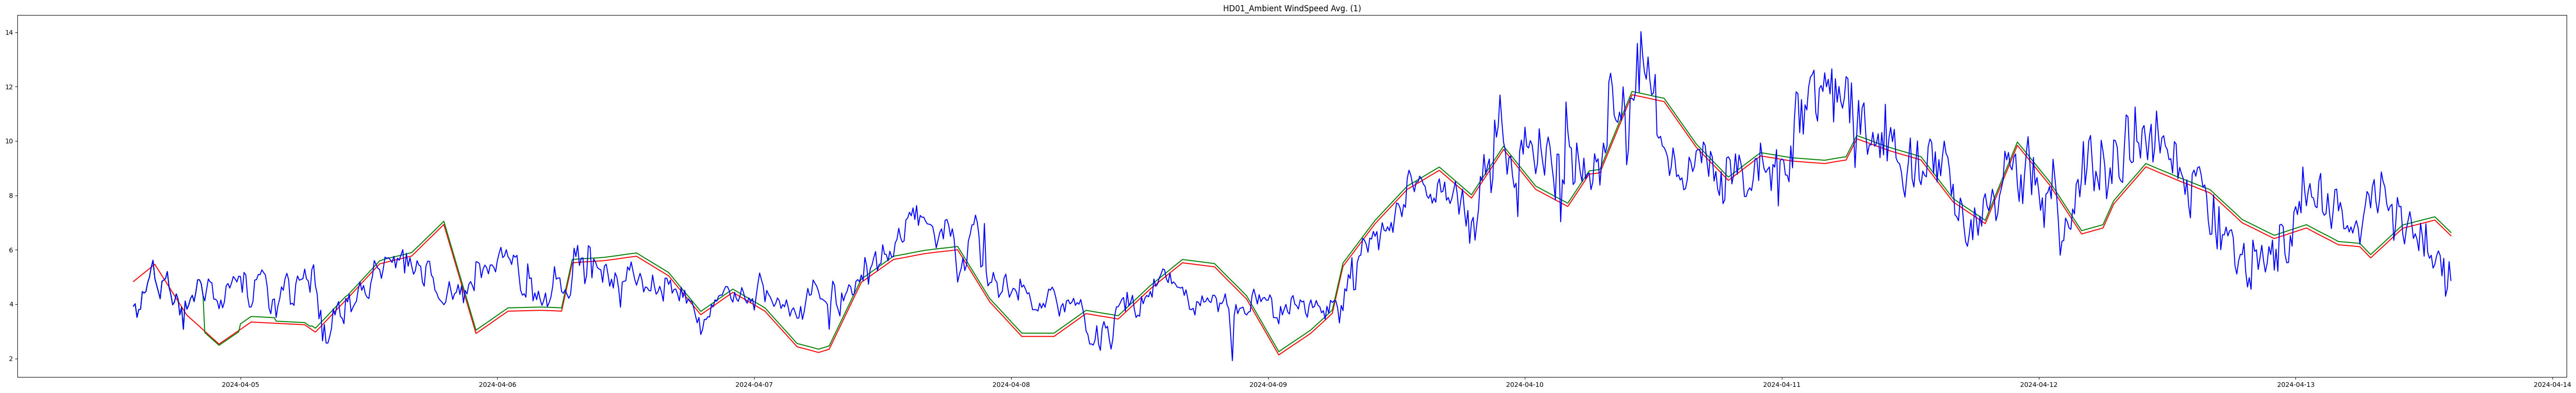

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], adjust_windspeeds, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [ ]:
print("===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, adjust_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, adjust_windspeeds)
print("Mean Absolute Percentage Error (MAPE):", windspeed_mape)

===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.3123539446722523
Mean Absolute Percentage Error (MAPE): 15.553849984191759


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

length = len(actual_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, adjust_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# windspeed_mape = mean_absolute_percentage_error(actual_windspeeds[:length//2], adjust_windspeeds[:length//2])
windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("\nMAPE_GLASS_MINUS_1_5 = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds, adjust_windspeeds)
print("MAPE_GLASS_ADJUSTED = ", windspeed_mape_adjust)

windspeed_mape_minus_1_5_one_third_length = mean_absolute_percentage_error(actual_windspeeds[:length//3], predicted_windspeeds_minus_1_5[:length//3])
print("\nMAPE_GLASS_MINUS_1_5_ONE_THIRD_LENGTH = ", windspeed_mape_minus_1_5_one_third_length)

windspeed_mape_adjust_one_third_length = mean_absolute_percentage_error(actual_windspeeds[:length//3], adjust_windspeeds[:length//3])
print("MAPE_GLASS_ADJUSTED_ONE_THIRD_LENGTH = ", windspeed_mape_adjust_one_third_length)

windspeed_mape_minus_1_5_half_length = mean_absolute_percentage_error(actual_windspeeds[:length//2], predicted_windspeeds_minus_1_5[:length//2])
print("\nMAPE_GLASS_MINUS_1_5_HALF_LENGTH = ", windspeed_mape_minus_1_5_half_length)

windspeed_mape_adjust_half_length = mean_absolute_percentage_error(actual_windspeeds[:length//2], adjust_windspeeds[:length//2])
print("MAPE_GLASS_ADJUSTED_HALF_LENGTH = ", windspeed_mape_adjust_half_length)

windspeed_mape_minus_1_5_full = mean_absolute_percentage_error(actual_windspeeds[:], predicted_windspeeds_minus_1_5[:])
print("\nMAPE_GLASS_MINUS_1_5_FULL = ", windspeed_mape_minus_1_5_full)

windspeed_mape_adjust_full = mean_absolute_percentage_error(actual_windspeeds[:], adjust_windspeeds[:])
print("MAPE_GLASS_ADJUSTED_FULL = ", windspeed_mape_adjust_full)


Mean Squared Error (MSE): 1.3123539446722523

MAPE_GLASS_MINUS_1_5 =  16.176620303638998
MAPE_GLASS_ADJUSTED =  15.553849984191759

MAPE_GLASS_MINUS_1_5_ONE_THIRD_LENGTH =  19.05610447982588
MAPE_GLASS_ADJUSTED_ONE_THIRD_LENGTH =  17.275698850992384

MAPE_GLASS_MINUS_1_5_HALF_LENGTH =  20.104428104299103
MAPE_GLASS_ADJUSTED_HALF_LENGTH =  18.82504640562736

MAPE_GLASS_MINUS_1_5_FULL =  16.176620303638998
MAPE_GLASS_ADJUSTED_FULL =  15.553849984191759


In [ ]:
# IMPLEMENT LINEAR REGRESSION
print("======== IMPLEMENT LINEAR REGRESSION \n")

y = actual_windspeeds.copy()
y_stable = stable_actual_windspeeds.copy()
X = predicted_windspeeds.copy()

# Reshape actual_windspeeds_lr from (N,) to (N, 1)
X = X.reshape(-1, 1)
print("X = ", X)
print("y = ", y)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X, y)

# Get the coefficients (weights)
lr_coefficients = lr_model.coef_

# Get the intercept
lr_intercept = lr_model.intercept_

print("\nLR Coefficients:", lr_coefficients)
print("LR Intercept:", lr_intercept)

y_predict_lr = lr_model.predict(X)
print("\ny_predict_lr = ", y_predict_lr)

======== IMPLEMENT LINEAR REGRESSION 

X =  [[6.33      ]
 [6.38333333]
 [6.43666667]
 ...
 [8.145     ]
 [8.08      ]
 [8.015     ]]
y =  [3.926 4.012 3.512 ... 4.578 5.563 4.871]

LR Coefficients: [0.89260869]
LR Intercept: -0.36597074137989516

y_predict_lr =  [5.28424225 5.33184805 5.37945384 ... 6.90432702 6.84630745 6.78828789]


In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], y_predict_lr, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



In [ ]:
print("===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED VS GLASS_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, y_predict_lr)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape_glass_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_GLASS_MINUS_1_5:", windspeed_mape_glass_minus_1_5)

lr_windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, y_predict_lr)
print("MAPE_LR_ADUSTED:", lr_windspeed_mape)

partly_range = range(0,100)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[partly_range], predicted_windspeeds_minus_1_5[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], adjust_windspeeds[partly_range])
print("MAPE_GLASS_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], y_predict_lr[partly_range])
print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED VS GLASS_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.223715702180861
MAPE_GLASS_MINUS_1_5: 16.176620303638998
MAPE_LR_ADUSTED: 15.308747739360893

MAPE_GLASS_MINUS_1_5_PARTLY =  24.780288488711587
MAPE_GLASS_ADJUSTED_PARTLY =  17.709466506804016
LR_ADJUSTED_PARTLY =  18.190526759086417


In [ ]:
print("======== LASSO REGRESSION")

from sklearn.linear_model import Lasso

# Create and fit Lasso Regression model
lasso_model = Lasso(alpha=0.0001)  # You can adjust alpha to control the strength of regularization
lasso_model.fit(X, y)

# Get the coefficients
lasso_coefficients = lasso_model.coef_

print("Coefficients:", lasso_coefficients)

lasso_intercept = lasso_model.intercept_

print("lasso_intercept = ", lasso_intercept)

======== LASSO REGRESSION
Coefficients: [0.89259115]
lasso_intercept =  -0.3658364332267894


In [ ]:
lasso_predictions = lasso_model.predict(X)
lasso_predictions

array([5.28426556, 5.33187042, 5.37947528, ..., 6.9043185 , 6.84630008,
       6.78828165])

In [ ]:
print("===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, lasso_predictions)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, lasso_predictions)
print("MAPE_LASSO = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.2237157039343423
MAPE_LASSO =  15.308683854770191
MAPE_MINUS_1_5 =  16.176620303638998


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



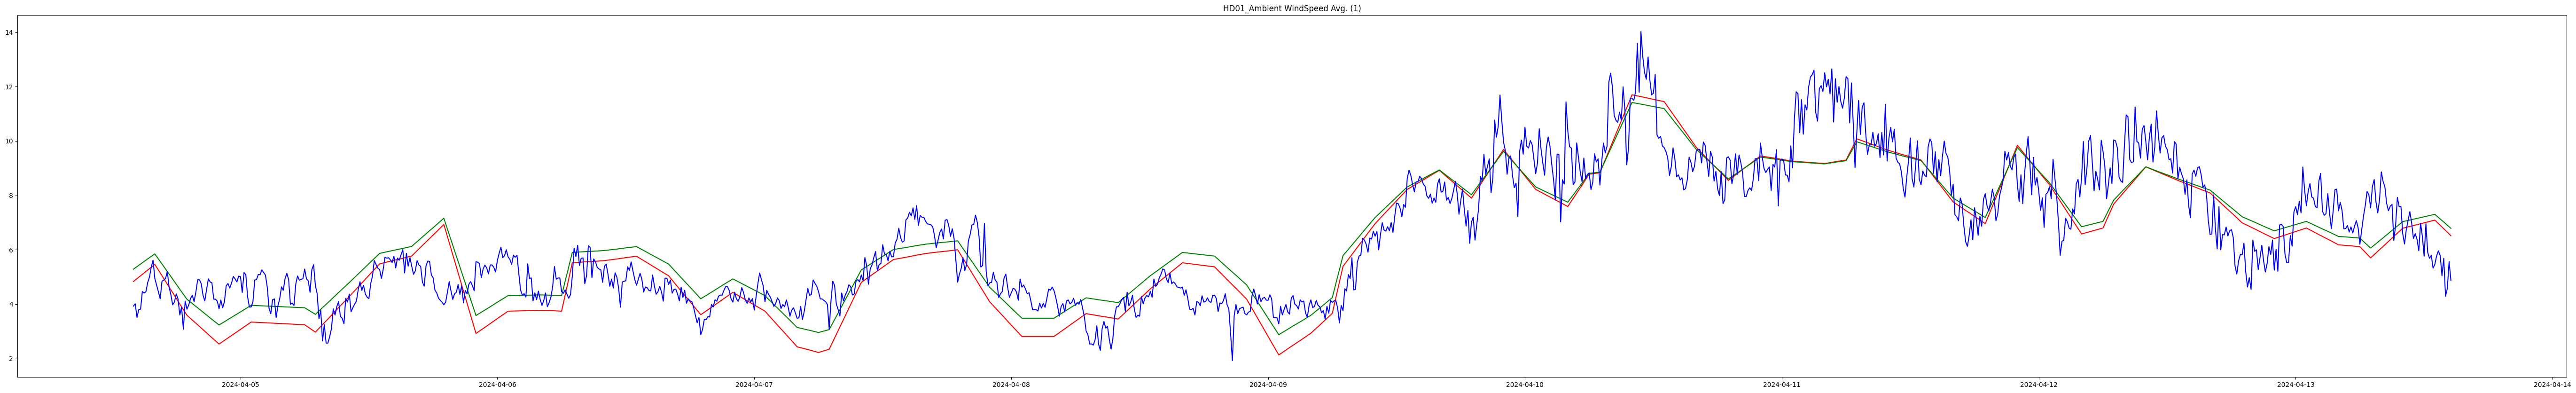

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], lasso_predictions, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

#### Linear Regress

In [ ]:
# IMPLEMENT LINEAR REGRESSION
print("======== IMPLEMENT LINEAR REGRESSION \n")

# Create feature X^2
X_squared = X**2

X_third = X**3

X_fourth = X**4

X_fifth = X**5

# Combine original feature and squared feature
X_extended = np.concatenate((X, X_squared, X_third, X_fourth, X_fifth), axis=1)

from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_extended, y)

# Get the coefficients (weights)
coefficients = poly_model.coef_

# Get the intercept
intercept = poly_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

======== IMPLEMENT LINEAR REGRESSION 

Coefficients: [ 1.94189743e+01 -5.89873628e+00  8.37728983e-01 -5.47315739e-02
  1.34260997e-03]
Intercept: -20.105107797990883


In [ ]:
lr_poly_predictions = poly_model.predict(X_extended)
lr_poly_predictions

array([4.71184921, 4.74947978, 4.78856113, ..., 6.64708459, 6.56246639,
       6.47827834])

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



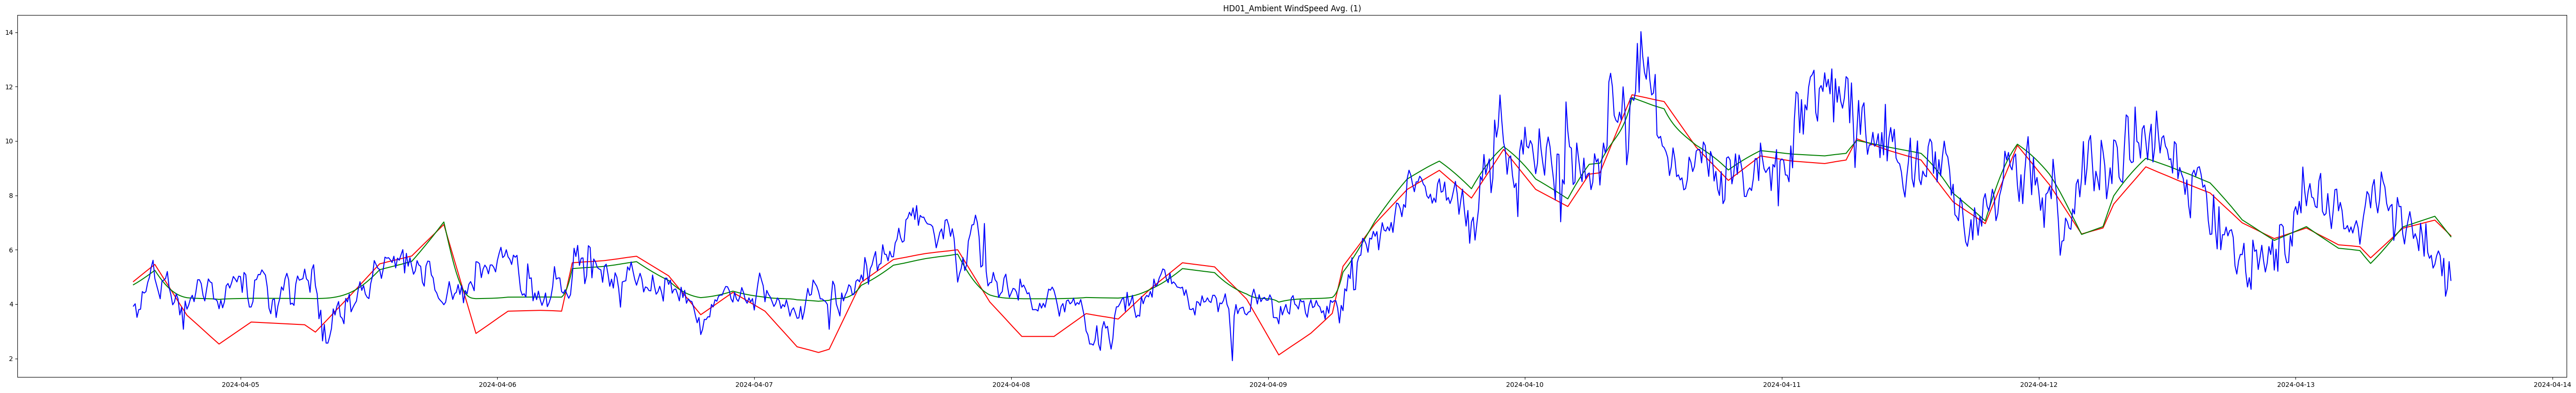

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], lr_poly_predictions, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [ ]:
print("===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, lr_poly_predictions)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, lr_poly_predictions)
print("MAPE_POLY_3 = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

partly_range = range(200,250)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[partly_range], predicted_windspeeds_minus_1_5[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], adjust_windspeeds[partly_range])
print("MAPE_GLASS_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], y_predict_lr[partly_range])
print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], lr_poly_predictions[partly_range])
print("LR_POLY_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.0449412935424087
MAPE_POLY_3 =  12.806284959167492
MAPE_MINUS_1_5 =  16.176620303638998

MAPE_GLASS_MINUS_1_5_PARTLY =  21.691971502270533
MAPE_GLASS_ADJUSTED_PARTLY =  19.649846712374156
LR_ADJUSTED_PARTLY =  14.468526565197932
LR_POLY_ADJUSTED_PARTLY =  13.512830298480633


#### Poly Linear Regression

In [ ]:
# Create feature X^2
X_test_squared = X_test**2

X_test_third = X_test**3

X_test_fourth = X_test**4

X_test_fifth = X_test**5

# Combine original feature and squared feature
X_test_extended = np.concatenate((X_test, X_test_squared, X_test_third, X_test_fourth, X_test_fifth), axis=1)

lr_poly_predict_test = poly_model.predict(X_test_extended)
print(len(lr_poly_predict_test))

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by LinearRegression.

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS POLY_LINEAR_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_predicted_windspeeds-1.5, "r")
plt.plot(test_glass_wind_df["time"], lr_poly_predict_test, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS POLY_LINEAR_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



In [ ]:
print("===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(test_actual_windspeeds, lr_poly_predict_test)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, lr_poly_predict_test)
print("MAPE_POLY_3 = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-1.5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

partly_range = range(0,20)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], (test_predicted_windspeeds-1.5)[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

# windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], y_predict_lr[partly_range])
# print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], lr_poly_predict_test[partly_range])
print("LR_POLY_ADJUSTED_PARTLY = ", windspeed_mape_adjust)


===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.9219298640801528
MAPE_POLY_3 =  27.020963368032263
MAPE_MINUS_1_5 =  30.056140490984834

MAPE_GLASS_MINUS_1_5_PARTLY =  23.638518613591735
LR_POLY_ADJUSTED_PARTLY =  20.20372852794436


#### Random Forest

In [ ]:
# For regression tasks
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=5, max_depth=5)

forest_model.fit(X, y)
# forest_model.fit(X, y_stable)

forest_predictions = forest_model.predict(X)

In [ ]:
y_stable

array([4.5646, 4.5646, 4.5646, ..., 4.578 , 5.563 , 4.871 ])

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], forest_predictions, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



In [ ]:
print("===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, forest_predictions)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, forest_predictions)
print("MAPE_FOREST = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)


partly_range = range(0,100)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[partly_range], predicted_windspeeds_minus_1_5[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], adjust_windspeeds[partly_range])
print("MAPE_GLASS_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], y_predict_lr[partly_range])
print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], lr_poly_predictions[partly_range])
print("LR_POLY_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], forest_predictions[partly_range])
print("FOREST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)


===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 0.8106055705970182
MAPE_FOREST =  11.262300966083801
MAPE_MINUS_1_5 =  16.176620303638998

MAPE_GLASS_MINUS_1_5_PARTLY =  24.780288488711587
MAPE_GLASS_ADJUSTED_PARTLY =  17.709466506804016
LR_ADJUSTED_PARTLY =  18.190526759086417
LR_POLY_ADJUSTED_PARTLY =  10.56793435080329
FOREST_ADJUSTED_PARTLY =  9.421923021233667


In [ ]:
forest_predict_test = forest_model.predict(X_test)

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS FOREST_LINEAR (GREEN) VS ACTUAL_WINSPEED (BLUE) 



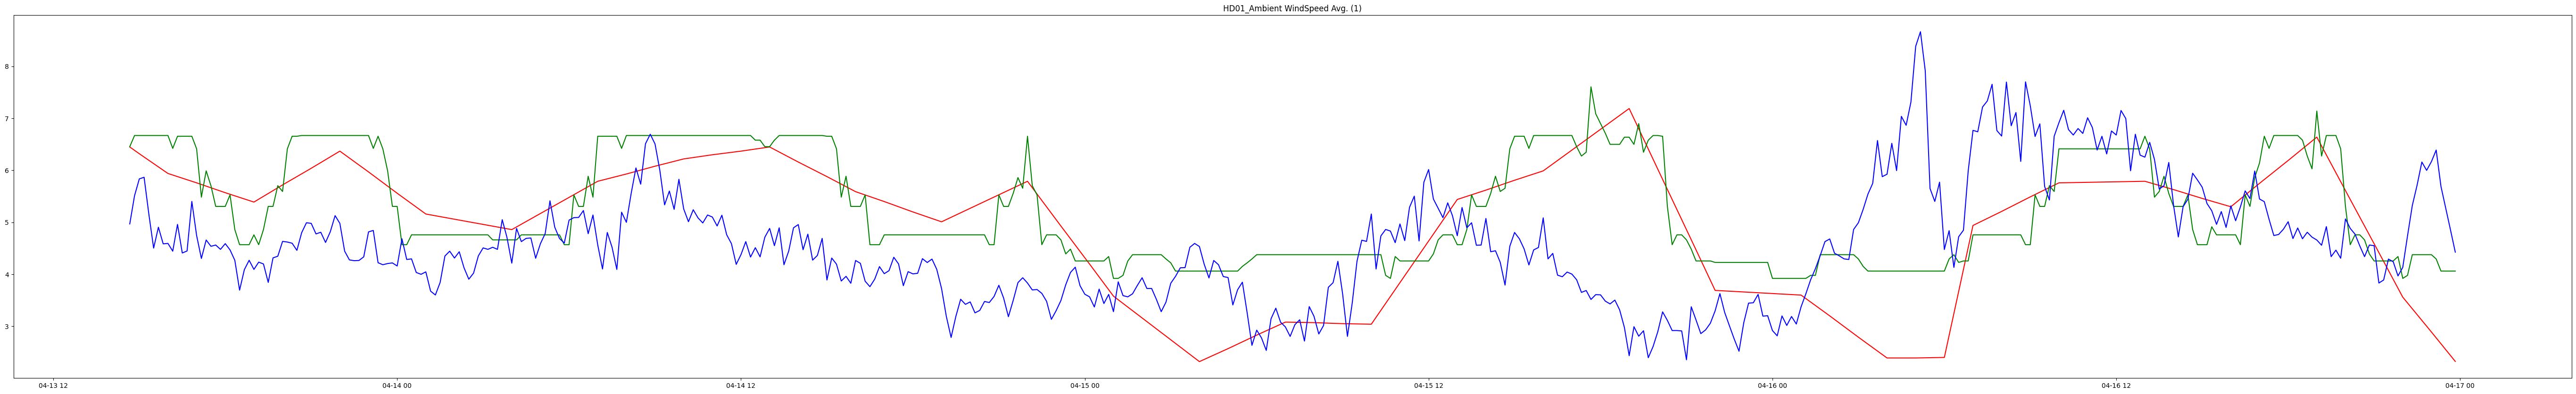

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS FOREST_LINEAR (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_predicted_windspeeds-1.5, "r")
plt.plot(test_glass_wind_df["time"], forest_predict_test, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [ ]:
print("===== MEASURE ACCURARY BETWEEN: FOREST_LINEAR VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(test_actual_windspeeds, forest_predict_test)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, forest_predict_test)
print("MAPE_FOREST = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-1.5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

partly_range = range(0,10)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], (test_predicted_windspeeds-1.5)[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

# windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], y_predict_lr[partly_range])
# print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], forest_predict_test[partly_range])
print("FOREST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

===== MEASURE ACCURARY BETWEEN: FOREST_LINEAR VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 2.335050554761093
MAPE_FOREST =  29.12982495645309
MAPE_MINUS_1_5 =  30.056140490984834

MAPE_GLASS_MINUS_1_5_PARTLY =  23.36194058373798
FOREST_ADJUSTED_PARTLY =  32.75584144043471


#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor(max_depth=5, n_estimators=30, learning_rate=0.5, random_state=42)
gradient_boosting_reg.fit(X, y)

gradient_boost_predictions = gradient_boosting_reg.predict(X)


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS GRADIENT_BOOSTING_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



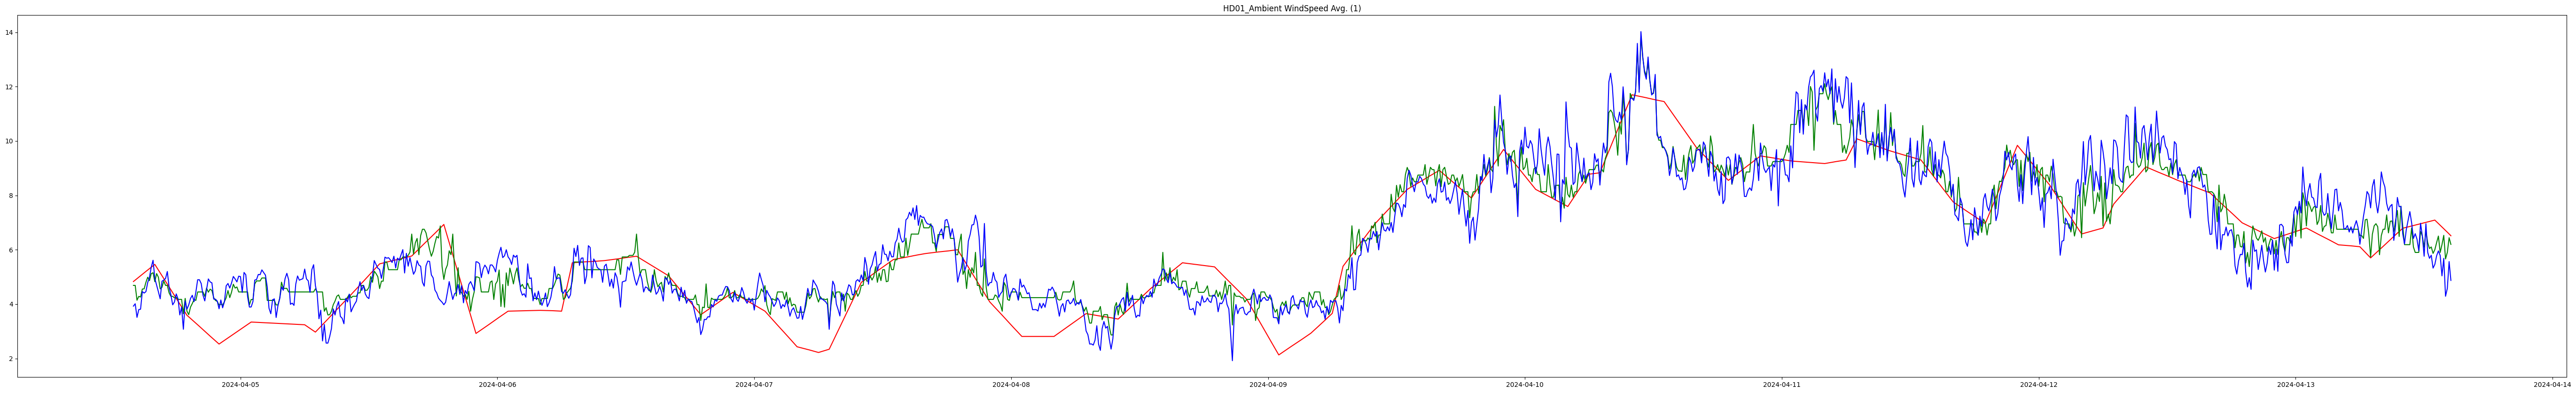

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS GRADIENT_BOOSTING_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], gradient_boost_predictions, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [ ]:
print("===== MEASURE ACCURARY BETWEEN: GRADIENT_BOOSTING_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, gradient_boost_predictions)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, gradient_boost_predictions)
print("MAPE_GRADIENT_BOOST = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)


partly_range = range(150,200)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[partly_range], predicted_windspeeds_minus_1_5[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], adjust_windspeeds[partly_range])
print("MAPE_GLASS_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], y_predict_lr[partly_range])
print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], lr_poly_predictions[partly_range])
print("LR_POLY_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], forest_predictions[partly_range])
print("FOREST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], gradient_boost_predictions[partly_range])
print("GRADIENT_BOOST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)


===== MEASURE ACCURARY BETWEEN: GRADIENT_BOOSTING_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 0.4748513045728241
MAPE_GRADIENT_BOOST =  8.5696991373331
MAPE_MINUS_1_5 =  16.176620303638998

MAPE_GLASS_MINUS_1_5_PARTLY =  27.499165523200492
MAPE_GLASS_ADJUSTED_PARTLY =  28.364256978396863
LR_ADJUSTED_PARTLY =  28.962619178205966
LR_POLY_ADJUSTED_PARTLY =  21.698950421764845
FOREST_ADJUSTED_PARTLY =  24.860383233436814
GRADIENT_BOOST_ADJUSTED_PARTLY =  18.369226946572585


In [ ]:
gradient_boost_predict_test = gradient_boosting_reg.predict(X_test)

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS GRADIENT_BOOSTING_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



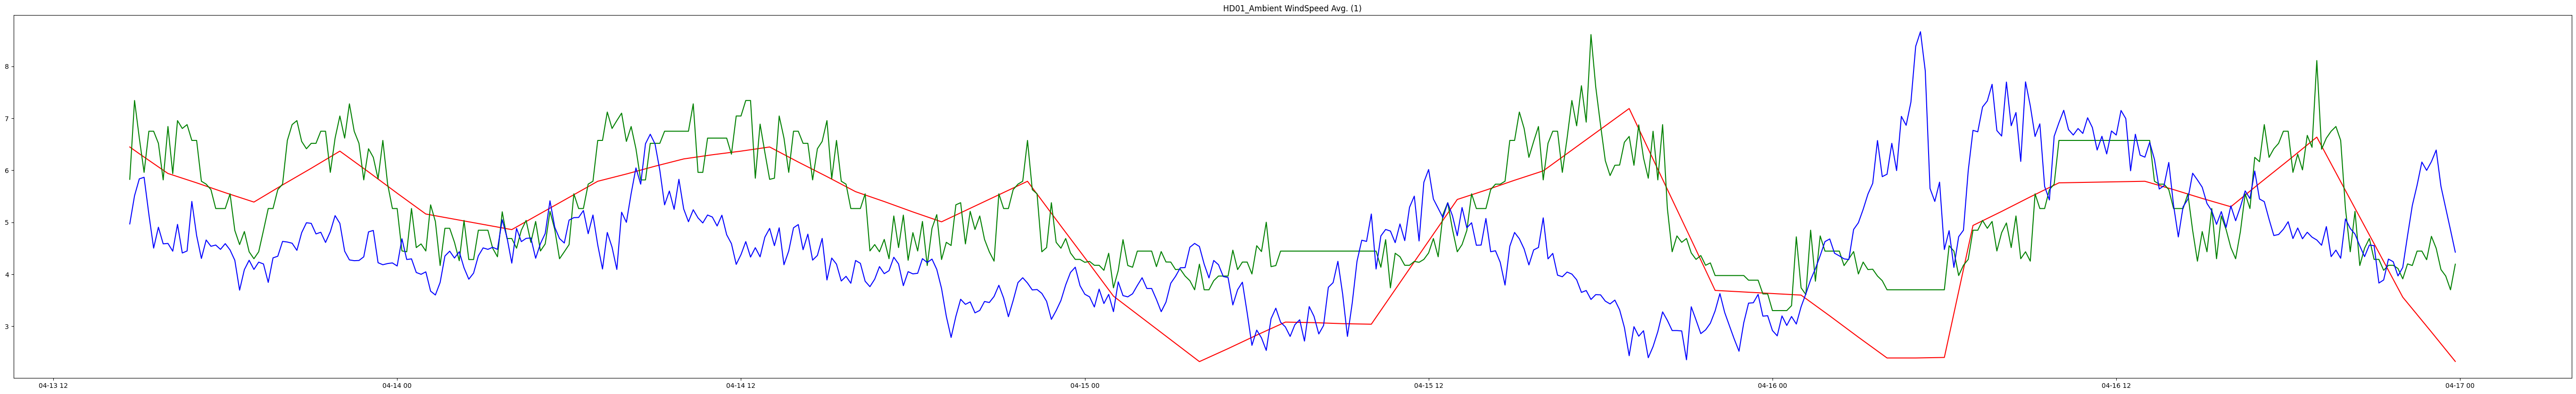

In [ ]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS GRADIENT_BOOSTING_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_predicted_windspeeds-1.5, "r")
plt.plot(test_glass_wind_df["time"], gradient_boost_predict_test, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [ ]:
print("===== MEASURE ACCURARY BETWEEN: FOREST_LINEAR VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(test_actual_windspeeds, gradient_boost_predict_test)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, gradient_boost_predict_test)
print("MAPE_GRADIENT_BOOST = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-1.5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

partly_range = range(0,10)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], (test_predicted_windspeeds-1.5)[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

# windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], y_predict_lr[partly_range])
# print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], forest_predict_test[partly_range])
print("FOREST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], gradient_boost_predict_test[partly_range])
print("GRADIENT_BOOST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

===== MEASURE ACCURARY BETWEEN: FOREST_LINEAR VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 2.3978095589933774
MAPE_GRADIENT_BOOST =  28.701647542995545
MAPE_MINUS_1_5 =  30.056140490984834

MAPE_GLASS_MINUS_1_5_PARTLY =  23.36194058373798
FOREST_ADJUSTED_PARTLY =  32.75584144043471
GRADIENT_BOOST_ADJUSTED_PARTLY =  28.874384442863914


### Data Visualization For Meteo Forecast API

In [ ]:
# LOAD FROM CSV TO PANDAS
meteo_wind_df = pd.read_csv('csv/meteo_forcast_100m.csv')

# SHOW DATA
meteo_wind_df.head(5)

time  meteo
0  2024-04-05T00:00:00+00:00   3.82
1  2024-04-05T01:00:00+00:00   4.27
2  2024-04-05T02:00:00+00:00   4.30
3  2024-04-05T03:00:00+00:00   4.56
4  2024-04-05T04:00:00+00:00   5.66

In [ ]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to time field to datetime type
meteo_wind_df['time'] = pd.to_datetime(meteo_wind_df['time'])

# Convert some columns to numeric type
numeric_columns = ['meteo']
meteo_wind_df[numeric_columns] = meteo_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
# CHECK TYPE OF ALL COLUMNS
meteo_wind_df.dtypes

time     datetime64[ns, UTC]
meteo                float64
dtype: object

In [ ]:
# SHOW DATA AFTER PREPROCESSING
meteo_wind_df.head(5)

time  meteo
0 2024-04-05 00:00:00+00:00   3.82
1 2024-04-05 01:00:00+00:00   4.27
2 2024-04-05 02:00:00+00:00   4.30
3 2024-04-05 03:00:00+00:00   4.56
4 2024-04-05 04:00:00+00:00   5.66

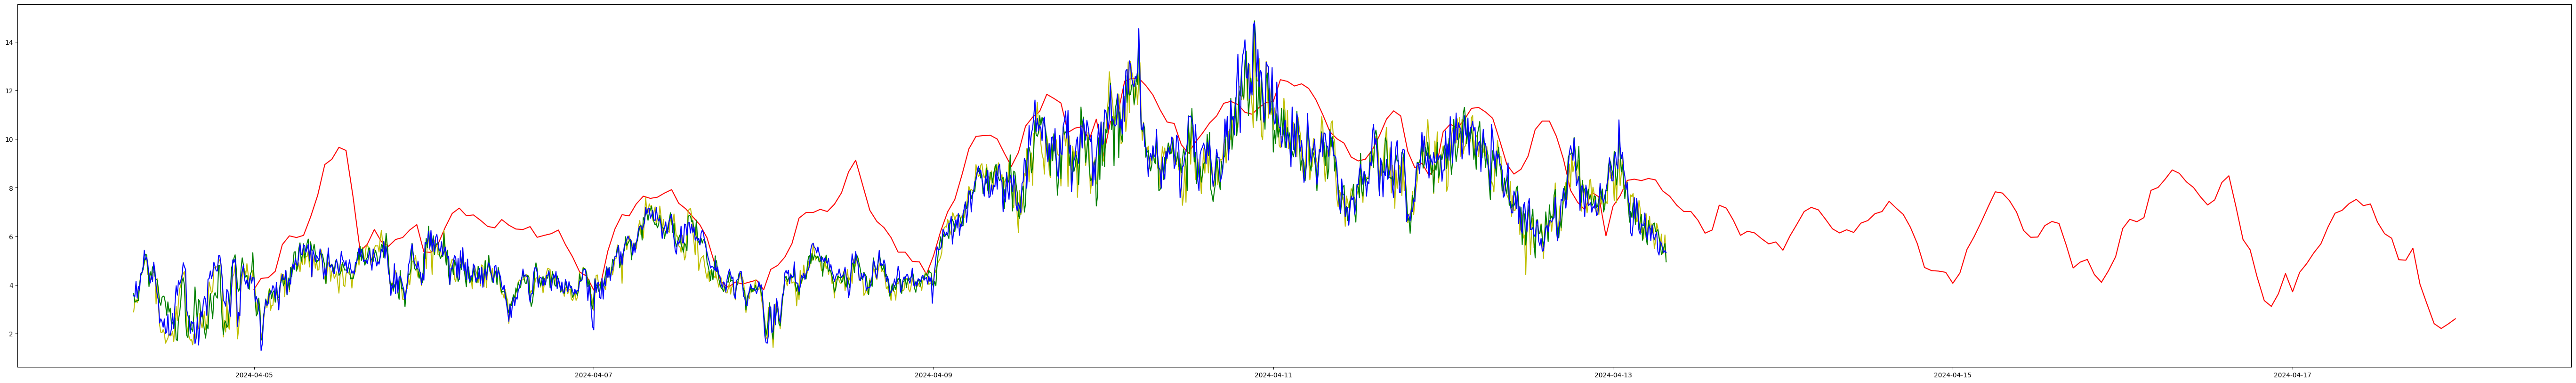

In [ ]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
# plt.plot(meteo_wind_df["time"], meteo_wind_df["meteo"], "r")
plt.plot(meteo_wind_df["time"], meteo_wind_df["meteo"], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD04_Ambient WindSpeed Avg. (4)"], "b")
plt.show()